Population projection model.

Data source: https://data-explorer.oecd.org (Historical population data)

Years: 1950 ~ 2021 (72 years)

Age groups: 0~4, 5~9, 10~14, ..., 80~84, 80+


Preprocessing the data.

Check columns and remove unnecessary ones.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np
import pandas as pd

%matplotlib widget
plt.ioff()

DATADIR = "./data/"
FILENAMES = ["kor_by_sex", "kor_total", "world_by_sex", "world_total"]


def remove_identical_col(df: pd.DataFrame):
    removed = {}
    for col in df.columns:
        if df[col].nunique() == 1:
            removed[col] = df[col][0]
            columns_to_drop.append(col)
    return removed


data: dict[str, pd.DataFrame] = {}
for name in FILENAMES:
    columns_to_drop = []
    data[name] = pd.read_csv(DATADIR + name + ".csv")
    print(remove_identical_col(data[name]))
    data[name].drop(columns=columns_to_drop, inplace=True)

for name in FILENAMES:
    print(data[name].columns.tolist())

{'DATAFLOW': 'OECD.ELS.SAE:DSD_POPULATION@DF_POP_HIST(1.0)', 'REF_AREA: Reference area': 'KOR: Korea', 'MEASURE: Measure': 'POP: Population', 'UNIT_MEASURE: Unit of measure': 'PS: Persons', 'TIME_HORIZ: Time horizon': 'H: Historical', 'OBS_STATUS: Observation status': 'A: Normal value', 'UNIT_MULT: Unit multiplier': '1: Tens', 'DECIMALS: Decimals': '0: Zero'}
{'DATAFLOW': 'OECD.ELS.SAE:DSD_POPULATION@DF_POP_HIST(1.0)', 'REF_AREA: Reference area': 'KOR: Korea', 'MEASURE: Measure': 'POP: Population', 'UNIT_MEASURE: Unit of measure': 'PS: Persons', 'SEX: Sex': '_T: Total', 'TIME_HORIZ: Time horizon': 'H: Historical', 'OBS_STATUS: Observation status': 'A: Normal value', 'UNIT_MULT: Unit multiplier': '1: Tens', 'DECIMALS: Decimals': '0: Zero'}
{'DATAFLOW': 'OECD.ELS.SAE:DSD_POPULATION@DF_POP_HIST(1.0)', 'REF_AREA: Reference area': 'W: World', 'MEASURE: Measure': 'POP: Population', 'UNIT_MEASURE: Unit of measure': 'PS: Persons', 'TIME_HORIZ: Time horizon': 'H: Historical', 'OBS_STATUS: Obser

Check age, time, sex values.

Rename some columns, values for convenience.


In [2]:
for name in FILENAMES:
    cols = data[name].columns.tolist()
    print(name)
    for col in cols:
        if col == "OBS_VALUE":
            data[name].rename(columns={col: "pop"}, inplace=True)

        elif col.startswith("AGE"):
            for i in np.sort(data[name][col].unique()):
                print(i.split(":")[0], end=" ")
                data[name].replace({col: {i: i.split(":")[0]}}, inplace=True)
            print("")
            data[name].rename(columns={col: "age"}, inplace=True)

        elif col.startswith("TIME"):
            for i in np.sort(data[name][col].unique()):
                print(i, end=" ")
            print("")
            data[name].rename(columns={col: "time"}, inplace=True)

        elif col.startswith("SEX"):
            for i in np.sort(data[name][col].unique()):
                print(i.split(":")[0], end=" ")
                data[name].replace({col: {i: i.split(":")[0]}}, inplace=True)
            print("")
            data[name].rename(columns={col: "sex"}, inplace=True)


kor_by_sex
F M 
Y10T14 Y15T19 Y20T24 Y25T29 Y30T34 Y35T39 Y40T44 Y45T49 Y50T54 Y55T59 Y5T9 Y60T64 Y65T69 Y70T74 Y75T79 Y80T84 Y_GE85 Y_LE4 _T 
1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
kor_total
Y10T14 Y15T19 Y20T24 Y25T29 Y30T34 Y35T39 Y40T44 Y45T49 Y50T54 Y55T59 Y5T9 Y60T64 Y65T69 Y70T74 Y75T79 Y80T84 Y_GE85 Y_LE4 _T 
1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021

In [3]:
AGE = [
    "Y_LE4",
    "Y5T9",
    "Y10T14",
    "Y15T19",
    "Y20T24",
    "Y25T29",
    "Y30T34",
    "Y35T39",
    "Y40T44",
    "Y45T49",
    "Y50T54",
    "Y55T59",
    "Y60T64",
    "Y65T69",
    "Y70T74",
    "Y75T79",
    "Y80T84",
    "Y_GE85",
    "_T",
]

TIME = list(range(1950, 2022))

SEX = ["F", "M"]

Sort data by age

In [4]:
for i in FILENAMES:
    data[i].sort_values(
        by="age", key=lambda x: x.apply(lambda y: AGE.index(y)), inplace=True
    )

Plot population


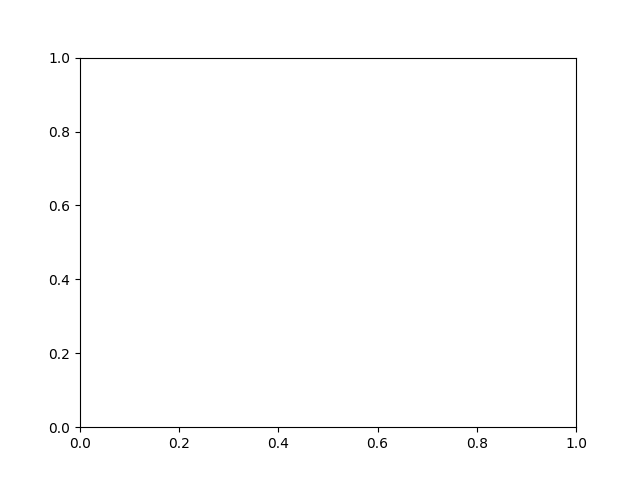

In [5]:
fig_p, ax_p = plt.subplots()
fig_p.canvas.header_visible = False


def animate_pop(i):
    ax_p.cla()
    ax_p.set_ylim(0, 4e8)
    ax_p.set_title("World population of year " + str(TIME[i]))
    filtered = data["world_by_sex"][data["world_by_sex"]["time"] == TIME[i]]
    filtered = filtered[filtered["age"] != AGE[-1]]
    filtered = filtered[filtered["age"] != AGE[-2]]
    filtered[filtered["sex"] == "F"].plot(
        x="age", y="pop", kind="line", ax=ax_p, label="Female"
    )
    filtered[filtered["sex"] == "M"].plot(
        x="age", y="pop", kind="line", ax=ax_p, label="Male"
    )


_ = anim.FuncAnimation(fig_p, animate_pop, range(len(TIME)), interval=50, repeat=False)
plt.show()

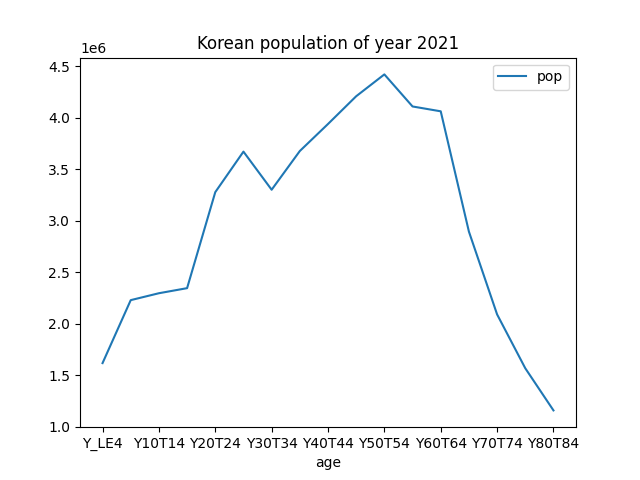

In [6]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Korean population of year 2021")
filtered = data["kor_total"][data["kor_total"]["time"] == 2021]
filtered = filtered[filtered["age"] != AGE[-1]]
filtered = filtered[filtered["age"] != AGE[-2]]
filtered.plot(
    x="age", y="pop", kind="line", ax=ax
)
plt.show()

Analyze birth rate and death rate.


In [7]:
def analyze_birth_death(data: pd.DataFrame):
    b_rate = pd.DataFrame(columns=["age", "time", "rate"])
    d_rate = pd.DataFrame(columns=["age", "time", "rate"])
    for time in range(TIME[0], TIME[-5]):
        current = data[data["time"] == time]
        next = data[data["time"] == time + 5]
        for age, next_age in zip(AGE[:-3], AGE[1:-2]):
            # Death rate
            r = 1 - (
                next[next["age"] == next_age]["pop"].sum()
                / current[current["age"] == age]["pop"].sum()
            )
            d_rate.loc[len(d_rate)] = [age, time, r]
        # Birth rate: Next newborns / Total population
        r = (
            next[next["age"] == AGE[0]]["pop"].sum()
            / current[current["age"] == AGE[-1]]["pop"].sum()
        )
        b_rate.loc[len(b_rate)] = [AGE[-1], time, r]
    return b_rate, d_rate

In [8]:
kor_b_total, kor_d_total = analyze_birth_death(data["kor_total"])
world_b_total, world_d_total = analyze_birth_death(data["world_total"])


Plot some data to check the result

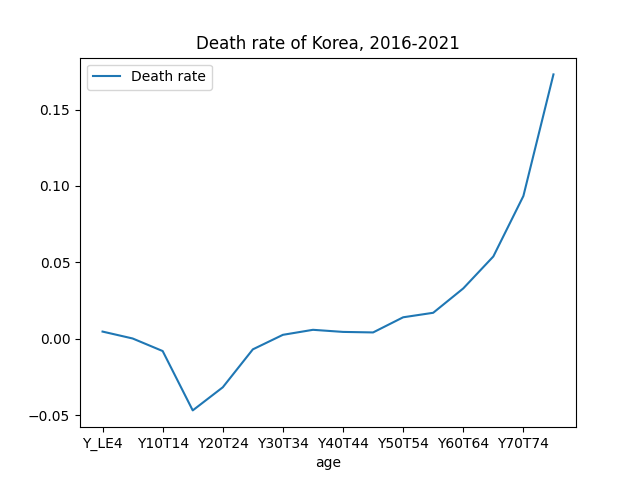

In [9]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Death rate of Korea, 2016-2021")
kor_d_total[kor_d_total["time"] == 2016].plot(
    x="age", y="rate", label="Death rate", kind="line", ax=ax
)
plt.show()


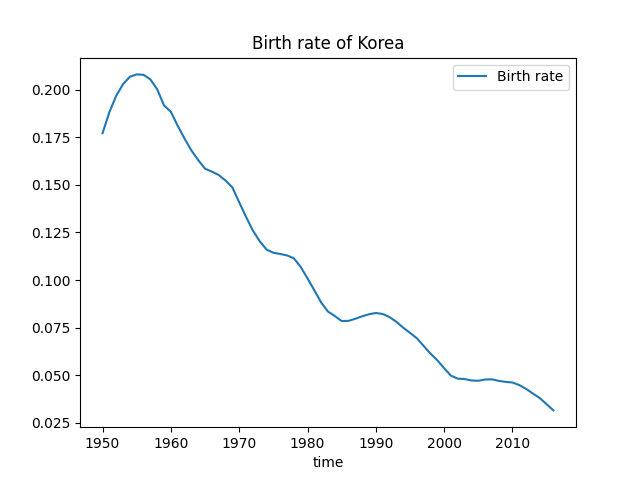

In [10]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Birth rate of Korea")
kor_b_total.plot(x="time", y="rate", label="Birth rate", kind="line", ax=ax)
plt.show()

Here, negative death rate is observed.

However, world total data don't have negative death rate.

Maybe this is because of immigration.

It will be quite difficult to create a population model specific to one country, because of immigration/emigration.


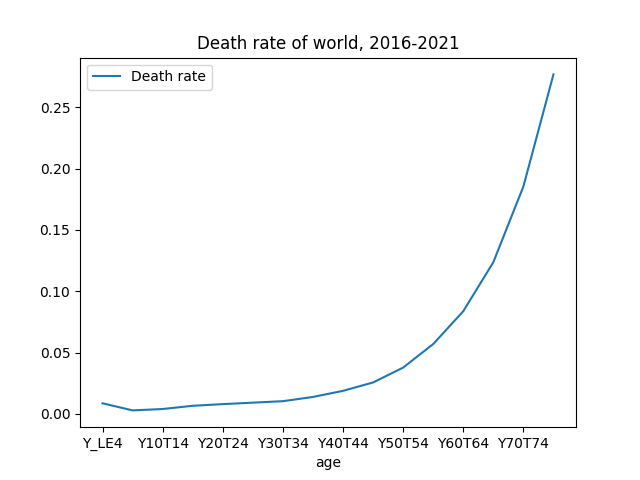

In [11]:
fig, ax = plt.subplots()
ax.set_title("Death rate of world, 2016-2021")
fig.canvas.header_visible = False
world_d_total[world_d_total["time"] == 2016].plot(
    x="age", y="rate", label="Death rate", kind="line", ax=ax
)
plt.show()


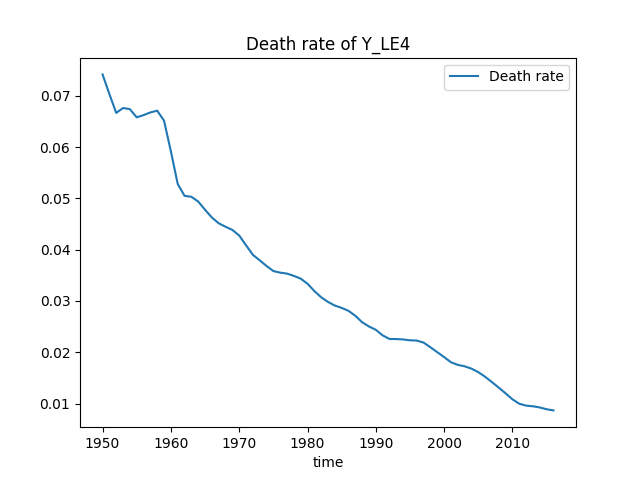

In [12]:
fig, ax = plt.subplots()
ax.set_title("Death rate of Y_LE4")
fig.canvas.header_visible = False
world_d_total[world_d_total["age"] == "Y_LE4"].plot(
    x="time", y="rate", label="Death rate", kind="line", ax=ax
)
plt.show()

In [13]:
def analyze_birth_death_by_sex(data: pd.DataFrame):
    b_rate = pd.DataFrame(columns=["sex", "age", "time", "rate"])
    d_rate = pd.DataFrame(columns=["sex", "age", "time", "rate"])
    for time in range(TIME[0], TIME[-5]):
        current = data[data["time"] == time]
        current_f = current[current["sex"] == "F"]
        current_m = current[current["sex"] == "M"]
        next = data[data["time"] == time + 5]
        next_f = next[next["sex"] == "F"]
        next_m = next[next["sex"] == "M"]
        for age, next_age in zip(AGE[:-3], AGE[1:-2]):
            # Death rate
            r = 1 - (
                next_f[next_f["age"] == next_age]["pop"].sum()
                / current_f[current_f["age"] == age]["pop"].sum()
            )
            d_rate.loc[len(d_rate)] = ["F", age, time, r]
            r = 1 - (
                next_m[next_m["age"] == next_age]["pop"].sum()
                / current_m[current_m["age"] == age]["pop"].sum()
            )
            d_rate.loc[len(d_rate)] = ["M", age, time, r]
        # Birth rate: Next newborns / Female aged 20 ~ 39
        f = current_f[current_f["age"].isin(["Y20T24", "Y25T29", "Y30T34", "Y35T39"])]
        r = next_f[next_f["age"] == AGE[0]]["pop"].sum() / f["pop"].sum()
        b_rate.loc[len(b_rate)] = ["F", AGE[-1], time, r]
        r = next_m[next_m["age"] == AGE[0]]["pop"].sum() / f["pop"].sum()
        b_rate.loc[len(b_rate)] = ["M", AGE[-1], time, r]
    return b_rate, d_rate

In [14]:
world_b_by_sex, world_d_by_sex = analyze_birth_death_by_sex(data["world_by_sex"])

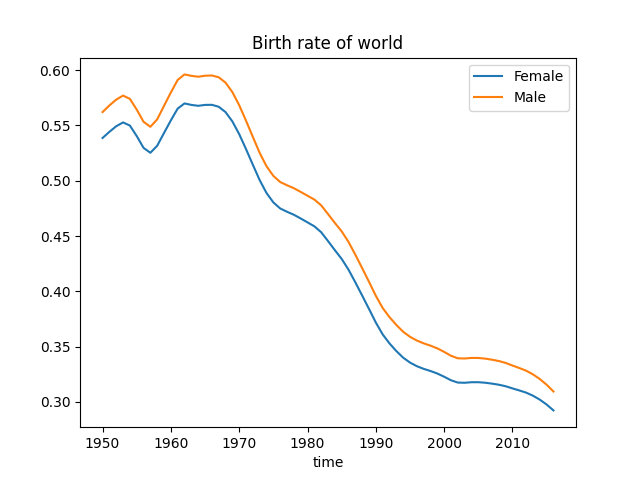

In [15]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Birth rate of world")
world_b_by_sex[world_b_by_sex["sex"] == "F"].plot(
    x="time", y="rate", kind="line", ax=ax, label="Female"
)
world_b_by_sex[world_b_by_sex["sex"] == "M"].plot(
    x="time", y="rate", kind="line", ax=ax, label="Male"
)
plt.show()


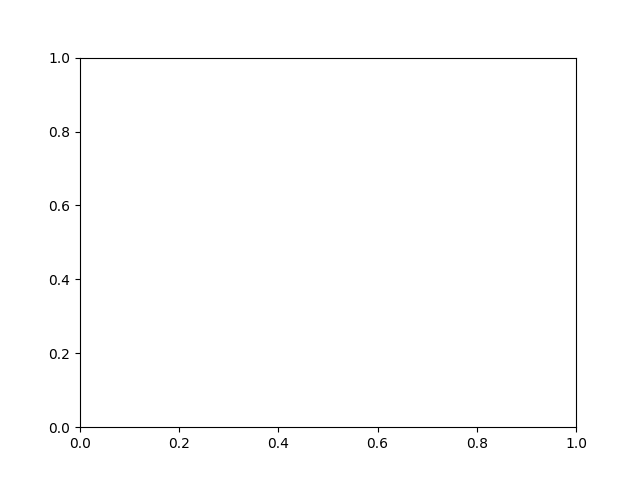

In [16]:
fig_d, ax_d = plt.subplots()
fig_d.canvas.header_visible = False

def animate_d(i):
    ax_d.cla()
    ax_d.set_title("Death rate of world, " + str(TIME[i]) + "-" + str(TIME[i + 5]))
    filtered = world_d_by_sex[world_d_by_sex["time"] == TIME[i]]
    filtered[filtered["sex"] == "F"].plot(
        x="age", y="rate", kind="line", ax=ax_d, label="Female"
    )
    filtered[filtered["sex"] == "M"].plot(
        x="age", y="rate", kind="line", ax=ax_d, label="Male"
    )


_ = anim.FuncAnimation(
    fig_d, animate_d, range(len(TIME) - 5), interval=50, repeat=False
)

plt.show()

Observation

- Birth rate and death rate both decreases over time.

Assumptions

- Death rate of age classes are linear functions of x, where x varies over time.
- Fecundity of age classes are linear functions of y, where y varies over time.

Functions may (and will) be different from each other.

Now calculate the linear functions that best fit the data.
Plot x over time and extrapolate to near future.
Then we can get the population projection.


In [17]:
x = []

for i in range(len(TIME) - 5):
    filtered = world_d_by_sex[world_d_by_sex["time"] == TIME[i]]
    x.append(filtered["rate"].values)

a = sum(x) / len(x)

z = x - a

for i in range(len(z)):
    if z[i][0] < 0:
        z[i] *= -1

u = sum(z) / np.linalg.norm(sum(z))

In [18]:
t = [0] * len(x)
z = x - a
for i in range(len(x)):
    t[i] = np.dot(z[i], u)

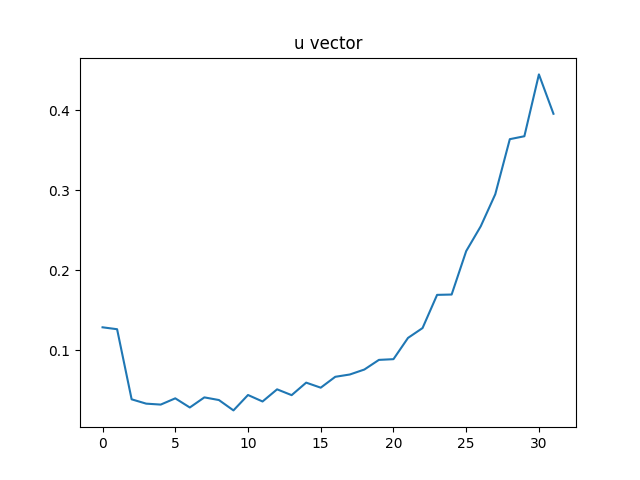

In [19]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("u vector")
ax.plot(u)
plt.show()

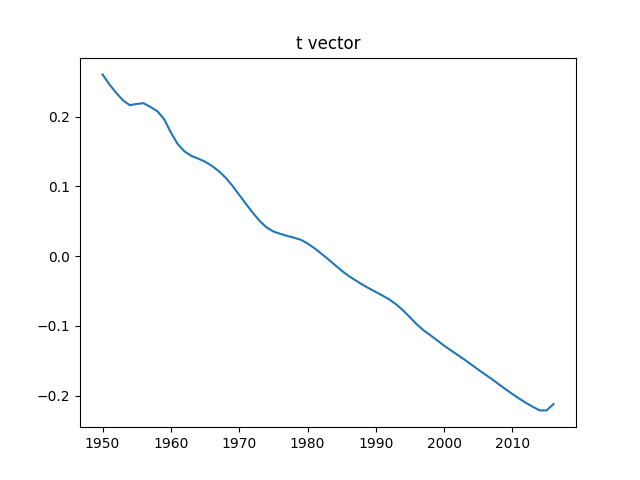

In [20]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("t vector")
ax.plot(TIME[:-5], t)
plt.show()

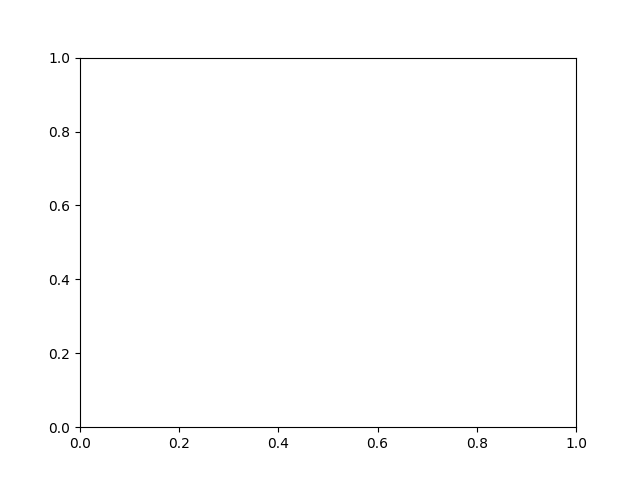

In [21]:
fig_e, ax_e = plt.subplots()
fig_e.canvas.header_visible = False

def animate_e(i):
    ax_e.cla()
    ax_e.set_title("Death rate of world, " + str(TIME[i]) + "-" + str(TIME[i + 5]))
    ax_e.plot(x[i])
    ax_e.plot(t[i]*u + a)

_ = anim.FuncAnimation(
    fig_e, animate_e, range(len(TIME) - 5), interval=50, repeat=False
)

plt.show()

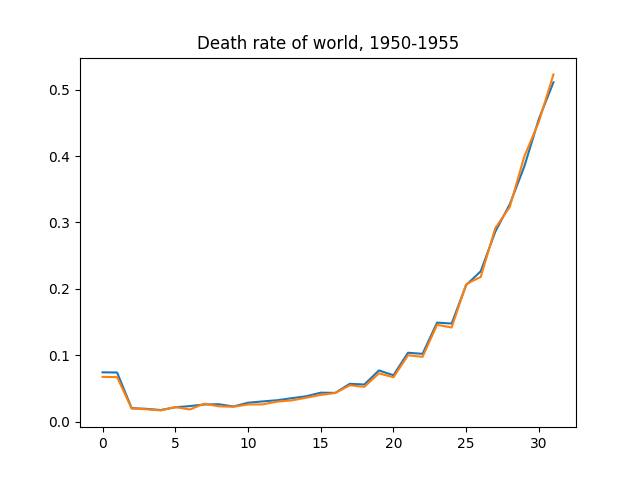

In [22]:
fig,ax = plt.subplots()
fig.canvas.header_visible = False
i = 0
ax.set_title("Death rate of world, " + str(TIME[i]) + "-" + str(TIME[i + 5]))
ax.plot(x[i])
ax.plot(t[i]*u + a)
plt.show()

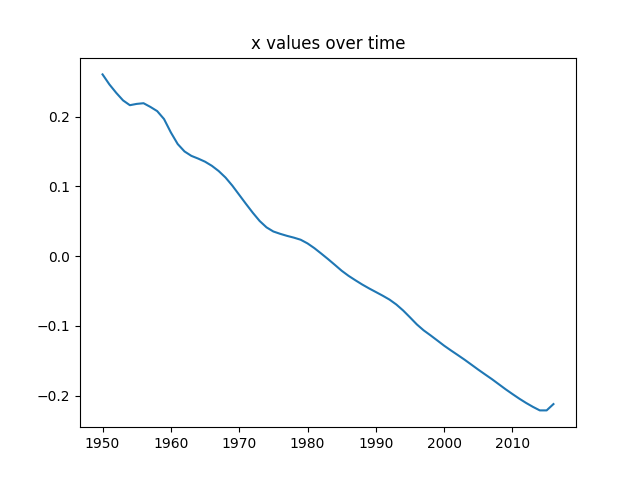

In [23]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False

# I called t in this file as x in the report
# So the title is x values over time
ax.set_title("x values over time")
ax.plot(TIME[:-5], t)
plt.show()

In [24]:
# Calculate minimum t such that death rates are non-negative
-min(a/u)

-0.24809627908602194

In [25]:
print(t)

[0.26043297946500743, 0.2461068237954828, 0.23402896150287722, 0.22318774489744905, 0.21629891349879385, 0.21817072438852247, 0.21913803741235205, 0.21385918823917616, 0.2078170494172042, 0.19644993570561986, 0.17724534855704063, 0.16064127728790728, 0.15002181714450105, 0.1437085831198415, 0.13978457729464783, 0.1353732071161346, 0.12946278418907303, 0.12193826550533815, 0.1126376635112099, 0.10100870842825854, 0.08790715343001534, 0.07480265487869904, 0.062091762959867056, 0.05035977069096685, 0.041272829377827, 0.035343020175739405, 0.03200914399226065, 0.0290843301564777, 0.026541208712208338, 0.023526245271650675, 0.018280307057680953, 0.011515712233629436, 0.0037812954201823044, -0.004166067261067422, -0.012444857418732014, -0.020890079322945065, -0.028136969330239917, -0.034483131279518145, -0.040580976066091325, -0.04613787379922289, -0.05137067286898252, -0.0566034699138324, -0.062237102984247575, -0.06926746526087976, -0.07784637749482554, -0.08766052468783328, -0.09776255603

In [26]:
# Rough expectation
t_expectation = [-0.21, -0.222, -0.23, -0.236, -0.24]

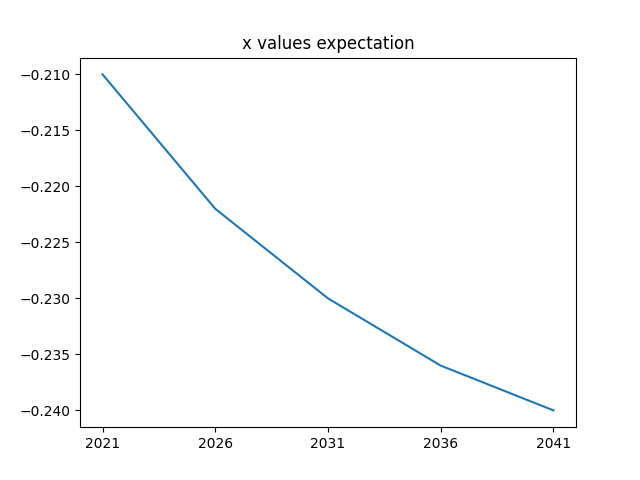

In [27]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("x values expectation")
ax.plot(range(2021, 2046, 5), t_expectation)
ax.set_xticks(range(2021, 2046, 5))
plt.show()

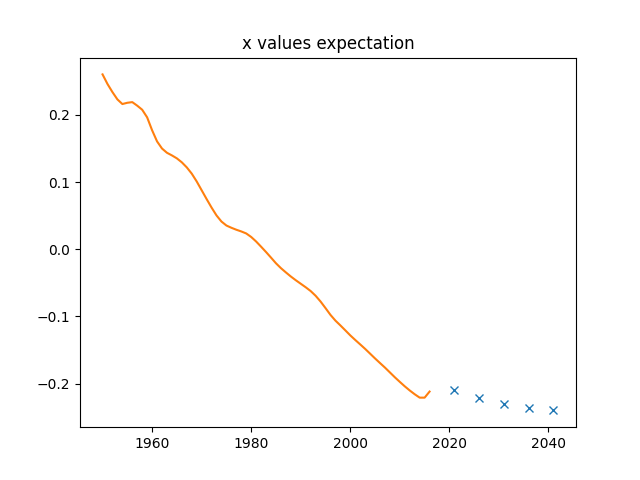

In [28]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("x values expectation")
ax.plot(range(2021, 2046, 5), t_expectation, 'x')
ax.plot(TIME[:-5], t)
plt.show()

In [29]:
b = world_b_by_sex[world_b_by_sex["time"]==2016]
print(b)
print(b[b["sex"]=="M"]["rate"].sum()/b[b["sex"]=="F"]["rate"].sum())

    sex age  time      rate
132   F  _T  2016  0.292372
133   M  _T  2016  0.309456
1.0584308332425274


Model 1: constant birth rate

In [30]:
filtered = data["world_by_sex"][data["world_by_sex"]["time"] == 2021]
population = np.concatenate(
    [
        filtered[filtered["sex"] == "F"]["pop"].values[:-2],
        filtered[filtered["sex"] == "M"]["pop"].values[:-2],
    ]
)


In [31]:
projection = [population]
for i in range(5):
    next_population = np.ndarray(34)
    d = t_expectation[i] * u + a
    for j in range(16):
        next_population[j + 1] = projection[i][j] * (1 - d[2 * j])
        next_population[j + 18] = projection[i][j + 17] * (1 - d[2 * j + 1])
    next_population[0] = sum(projection[i][4:8]) * b[b["sex"]=="F"]["rate"].sum()
    next_population[17] = sum(projection[i][4:8]) * b[b["sex"]=="M"]["rate"].sum()
    projection.append(next_population)

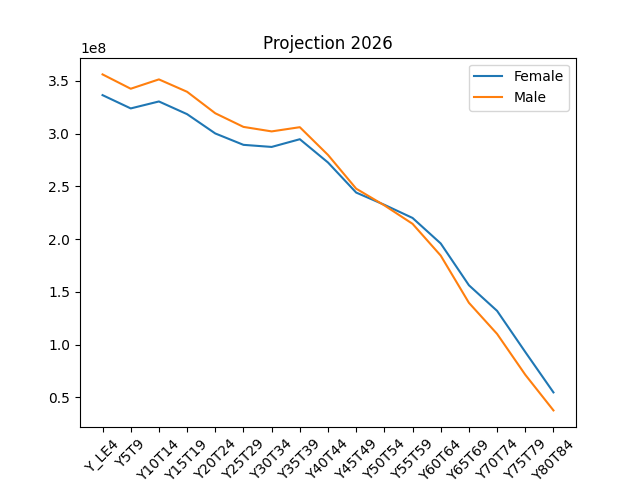

In [32]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Projection 2026")
ax.plot(AGE[:-2], projection[1][:17], label="Female")
ax.plot(AGE[:-2], projection[1][17:], label="Male")
plt.legend()
plt.xticks(rotation=45)
plt.show()

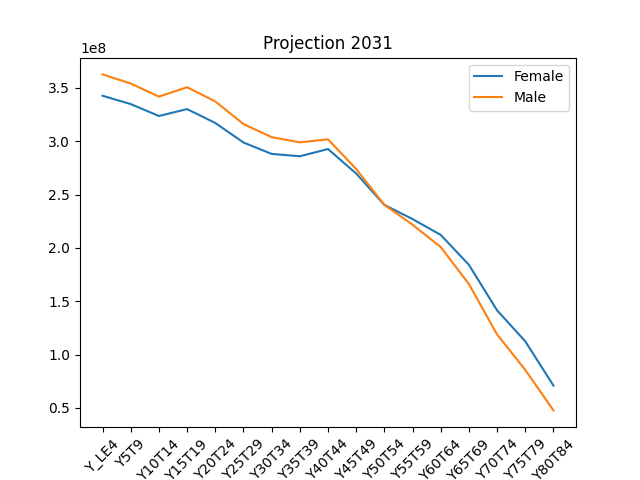

In [33]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Projection 2031")
ax.plot(AGE[:-2], projection[2][:17], label="Female")
ax.plot(AGE[:-2], projection[2][17:], label="Male")
plt.legend()
plt.xticks(rotation=45)
plt.show()

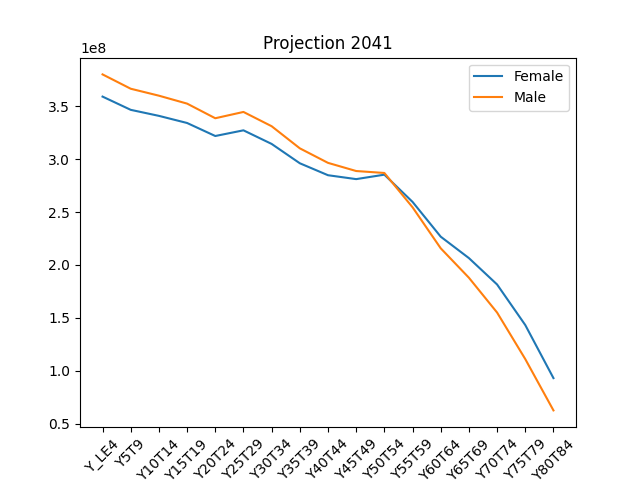

In [34]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Projection 2041")
ax.plot(AGE[:-2], projection[4][:17], label="Female")
ax.plot(AGE[:-2], projection[4][17:], label="Male")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [35]:
print(sum(projection[1]), sum(projection[2]), sum(projection[4]))

8224191961.551046 8594178344.082092 9247160821.905088


Model 2: decreasing birth rate

In [36]:
b_expectation = np.array([0.285, 0.275, 0.267, 0.26, 0.255])

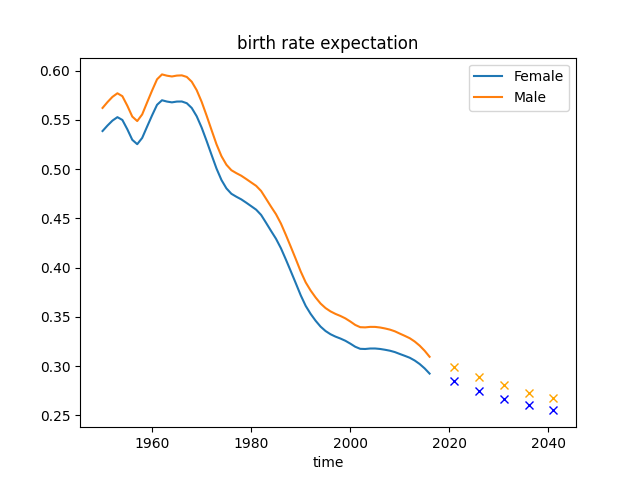

In [37]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("birth rate expectation")
world_b_by_sex[world_b_by_sex["sex"] == "F"].plot(
    x="time", y="rate", kind="line", ax=ax, label="Female"
)
world_b_by_sex[world_b_by_sex["sex"] == "M"].plot(
    x="time", y="rate", kind="line", ax=ax, label="Male"
)
ax.plot(range(2021, 2046, 5), b_expectation, "x", color="blue")
ax.plot(range(2021, 2046, 5), b_expectation*1.05, "x", color="orange")
plt.show()

In [38]:
projection = [population]
for i in range(4):
    next_population = np.ndarray(34)
    d = t_expectation[i] * u + a
    for j in range(16):
        next_population[j + 1] = projection[i][j] * (1 - d[2 * j])
        next_population[j + 18] = projection[i][j + 17] * (1 - d[2 * j + 1])
    next_population[0] = sum(projection[i][4:8]) * b_expectation[i]
    next_population[17] = sum(projection[i][4:8]) * b_expectation[i] * 1.05
    projection.append(next_population)

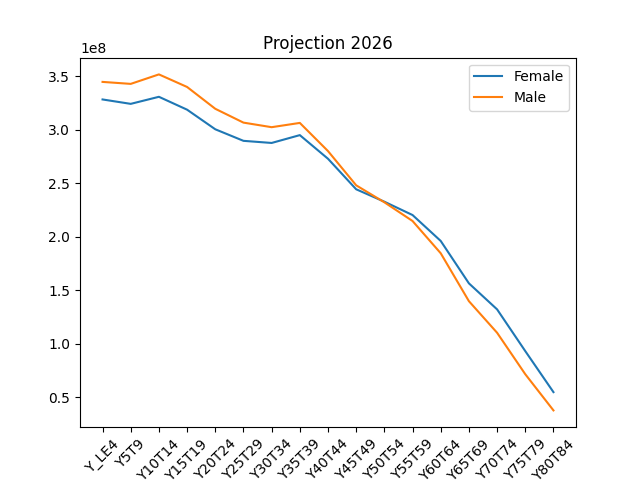

In [39]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Projection 2026")
ax.plot(AGE[:-2], projection[1][:17], label="Female")
ax.plot(AGE[:-2], projection[1][17:], label="Male")
plt.legend()
plt.xticks(rotation=45)
plt.show()

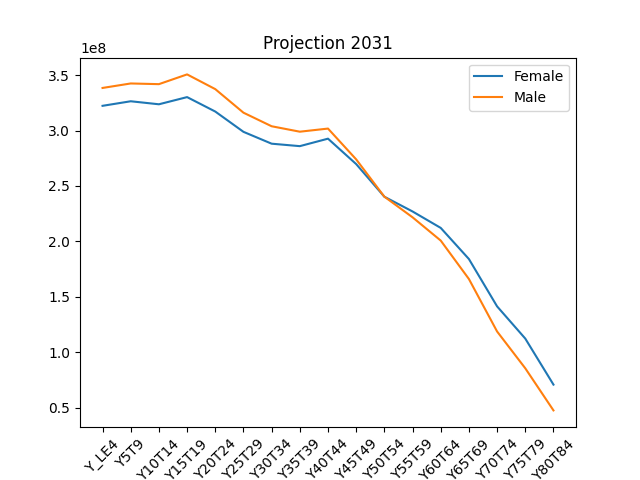

In [40]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Projection 2031")
ax.plot(AGE[:-2], projection[2][:17], label="Female")
ax.plot(AGE[:-2], projection[2][17:], label="Male")
plt.legend()
plt.xticks(rotation=45)
plt.show()

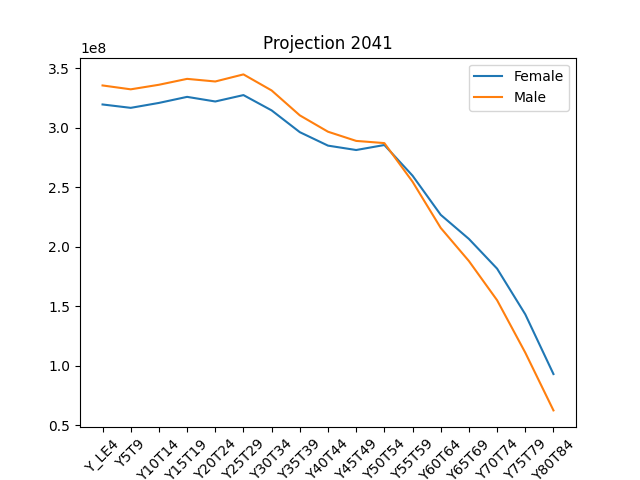

In [41]:
fig, ax = plt.subplots()
fig.canvas.header_visible = False
ax.set_title("Projection 2041")
ax.plot(AGE[:-2], projection[4][:17], label="Female")
ax.plot(AGE[:-2], projection[4][17:], label="Male")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [42]:
print(sum(projection[1]), sum(projection[2]), sum(projection[4]))

8203955898.521151 8529435262.100794 9033606399.718254
